# Python Machine Learning - Code Examples

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from IPython.display import Image
%matplotlib inline

# Dealing with missing data

## Identifying missing values in tabular data

In [113]:
import pandas as pd
from io import StringIO
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [4]:
df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [5]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [6]:
# access the underlying NumPy array
# via the `values` attribute
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

<br>
<br>

## Eliminating training examples or features with missing values

In [7]:
# remove rows that contain missing values
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
# remove columns that contain missing values

df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [9]:
# only drop rows where all columns are NaN

df.dropna(how='all')  

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [12]:
# drop rows that have fewer than 4 real values 

df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [10]:
# only drop rows where NaN appear in specific columns (here: 'C')

df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [13]:
df.dropna(subset=['C', 'D'])

,A,B,C,D
0,1.0,2.0,3.0,4.0


<br>
<br>

## Imputing missing values

In [14]:
# again: our original array
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [122]:
# impute missing values via the column mean

from sklearn.impute import SimpleImputer
import numpy as np

#Takes numpy array #Outputs numpy array
imr = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0) #strategy=['mean', 'median', 'most_frequent', 'constant'(fill_value=100)]
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data 

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  0.,  8.],
       [10., 11., 12.,  0.]])

In [17]:
mean_cols = df.mean()
mean_cols

A    5.333333
B    6.333333
C    7.500000
D    6.000000
dtype: float64

In [19]:
mean_cols = df.mean()
df.fillna(mean_cols)

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [20]:
# why? --> you should do it inplace
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [22]:
df_nonan = df.fillna(mean_cols)

In [23]:
df.fillna(mean_cols, inplace=True)

# Handling categorical data

In [78]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


## Encoding class labels

In [79]:
df['classlabel']

0    class2
1    class1
2    class2
Name: classlabel, dtype: object

In [80]:
np.unique(df['classlabel'])

array(['class1', 'class2'], dtype=object)

In [81]:
{label for  label in np.unique(df['classlabel'])}

{'class1', 'class2'}

In [82]:
{label: idx for idx, label in enumerate(np.unique(df['classlabel']))}

{'class1': 0, 'class2': 1}

In [83]:
import numpy as np

# create a mapping dict
# to convert class labels from strings to integers
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [84]:
# to convert class labels from strings to integers
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,1
1,red,L,13.5,0
2,blue,XL,15.3,1


In [85]:
# reverse the class label mapping
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


remember the old way with loc or with df[df.label == \'ss\'] =1 --> forget about it

remember the method we have just talked about --> forget about it

In [86]:
from sklearn.preprocessing import LabelEncoder

# Label encoding with sklearn's LabelEncoder, it takes one dimension array --> very important
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

## Nominal and ordinal features

## Mapping ordinal features

In [87]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [88]:
size_mapping.items()

dict_items([('XL', 3), ('L', 2), ('M', 1)])

In [89]:
for k, v in size_mapping.items():
  print(k,v)

XL 3
L 2
M 1


In [90]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [91]:
df['size'].values

array([1, 2, 3])

In [95]:
from sklearn.preprocessing import OrdinalEncoder # takes 2-dim array
ord_enc = OrdinalEncoder()
#ord_enc.fit_transform(df['size'].values) #gives you error

In [97]:
ord_enc.fit_transform(df['size'].values.reshape(-1,1)) # means msh mohm yb2a 3ndi kam sf, elmohm yb2a 3ndi 1 column

array([[0.],
       [1.],
       [2.]])

## Performing one-hot encoding on nominal features

onehot encoding

In [105]:
from sklearn.preprocessing import OneHotEncoder
X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder(sparse=False)


In [101]:
#color_ohe.fit_transform(X[:, 0]) #error

In [102]:
X[:, 0]

array(['green', 'red', 'blue'], dtype=object)

In [103]:
X[:, 0].reshape(-1, 1)

array([['green'],
       ['red'],
       ['blue']], dtype=object)

In [104]:
color_ohe.fit_transform(X[:, 0].reshape(-1, 1))

<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [106]:
color_ohe.fit_transform(X[:, 0].reshape(-1, 1))

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [107]:
#Create dummy features for the colors
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder(sparse=False)
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)) #expects 2d array , -1 to indicate all of the rows

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

do it all with columntransformer بيعمل كل اللي نفسك فيه

In [109]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [56]:
X = df[['color', 'size', 'price']].values
X

array([['green', 'M', 10.1],
       ['red', 'L', 13.5],
       ['blue', 'XL', 15.3]], dtype=object)

In [54]:
#takes a list of tuples (string:name of transformation, object of the transformer, the columns to be transformed)

In [57]:
X

array([['green', 'M', 10.1],
       ['red', 'L', 13.5],
       ['blue', 'XL', 15.3]], dtype=object)

In [110]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
one_hot_enc = OneHotEncoder(sparse=False)
ord_enc = OrdinalEncoder()
c_transf = ColumnTransformer([('onehot', one_hot_enc, [0]),
                              ('labelencoder', ord_enc, [1]),
                              ('nothing', 'passthrough', [2])])
c_transf.fit_transform(X)

array([[0.0, 1.0, 0.0, 0.0, 10.1],
       [0.0, 0.0, 1.0, 1.0, 13.5],
       [1.0, 0.0, 0.0, 2.0, 15.3]], dtype=object)

In [111]:
# Label encoding with sklearn's LabelEncoder, it takes one dimension array --> very important
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

# Summary

**1- See if your dataset has missing values (nan)**

  a) replace them with mean if you have small dataset

  b) remove features with missing values if you have a lot of features

  c) remove examples with missing values if you have a lot of examples

**2- Map Categorical Data**

Ordinal data: regular mapping with order relation

Nominal data (Include Labels): map with ColumnTransformer

# Partitioning a dataset into a seperate training and test set

In [125]:
df_wine = pd.read_csv('/content/drive/MyDrive/Introduction to Machine Learning/Notebooks/ch04/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [126]:
print('Class labels', np.unique(df_wine['Class label']))


Class labels [1 2 3]


In [127]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,  random_state=0) 

<br>
<br>

# Bringing features onto the same scale

In [128]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_train_norm = mms.fit_transform(X_train)

X_test_norm = mms.transform(X_test)

In [129]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)

X_test_std = stdsc.transform(X_test)

# Selecting meaningful features

## Sequential feature selection algorithms

In [ ]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

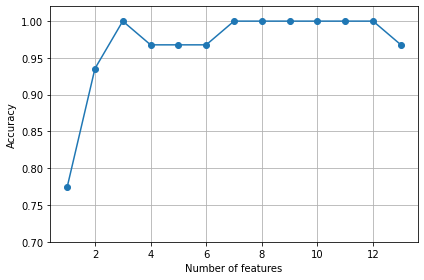

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

In [ ]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [ ]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


In [ ]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


# PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [ ]:
X_train_pca.shape

(124, 3)

In [ ]:
knn.fit(X_train_pca, y_train)
print('Training accuracy:', knn.score(X_train_pca, y_train))
print('Test accuracy:', knn.score(X_test_pca, y_test))

Training accuracy: 0.9758064516129032
Test accuracy: 0.9629629629629629


#Garbage

In [ ]:
#..
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
X = df_wine.iloc[:, 1:]
y = df_wine.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_pred, y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_std, y_train)
y_pred = knn.predict(X_test_std)
accuracy_score(y_pred, y_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_std)
X_test_pca = pca.transform(X_test_std)


knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)
accuracy_score(y_pred, y_test)

In [ ]:
#..
knn = KNeighborsClassifier(n_neighbors=5)
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(knn, direction='backward')
sfs.fit(X_std, y_train)
SequentialFeatureSelector(estimator=knn, direction='backward')
sfs.get_support()

In [ ]:
X_train_selected = sfs.transform(X_std)
X_test_selected = sfs.transform(X_test_std)

In [ ]:
knn.fit(X_train_selected, y_train)
y_pred = knn.predict(X_test_selected)
accuracy_score(y_pred, y_test)